0
Index: 0
Filename: Alsub-Tacap-TaCoPt5xTa-TF-IP_24-10-11-14_12_09
Sample Name: AlSiO2-CoPt5x-IP
Area: 1 cm^2
Thickness: 5e-07
Material: CoPt5x
---
[ 5.25433357e-09 -6.92602455e-04] [5.84199415e-09 6.87702333e-04]


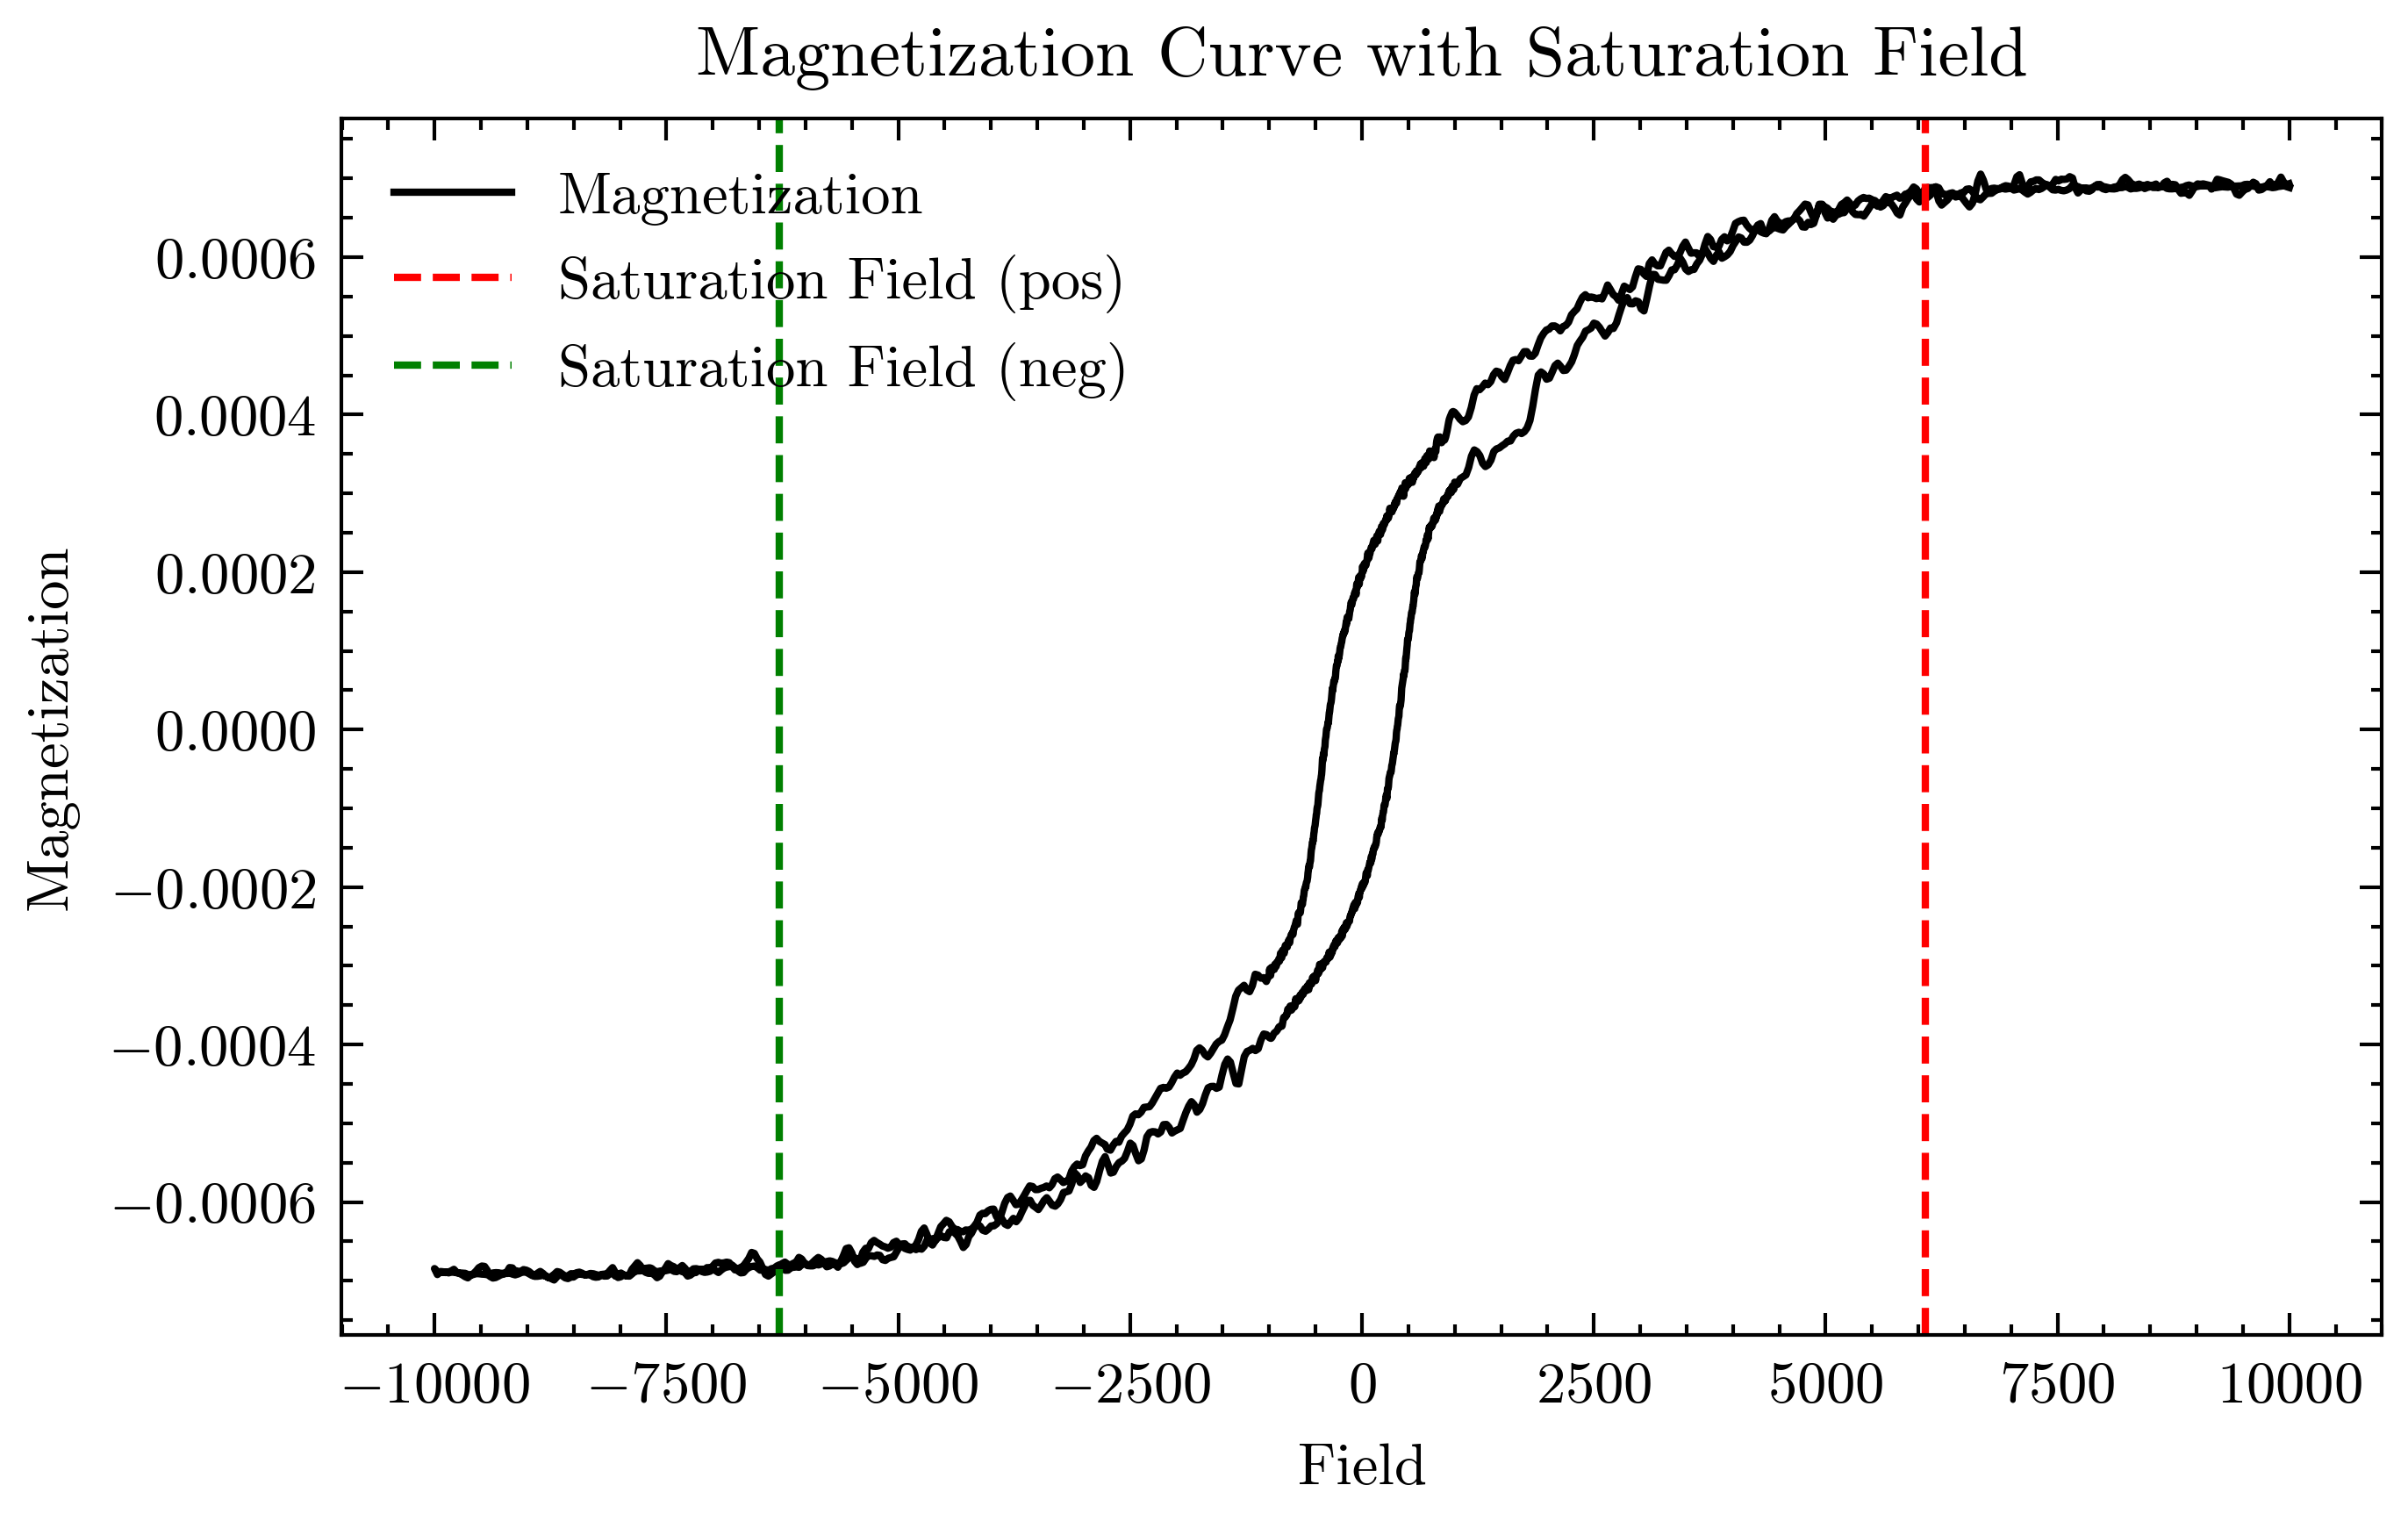

Summary of sample properties: 
 Ms =  1380.304787940941 
 Hc =  378.615 
 Hs =  6175.98 

1
Index: 1
Filename: Alsub-Tacap-TaCoPt5xTa-TF-OP_24-10-11-14_00_21
Sample Name: AlSiO2-CoPt5x-OP
Area: 1 cm^2
Thickness: 5e-07
Material: CoPt5x
---
[ 1.33322038e-08 -6.80691788e-04] [1.34975029e-08 6.78024286e-04]


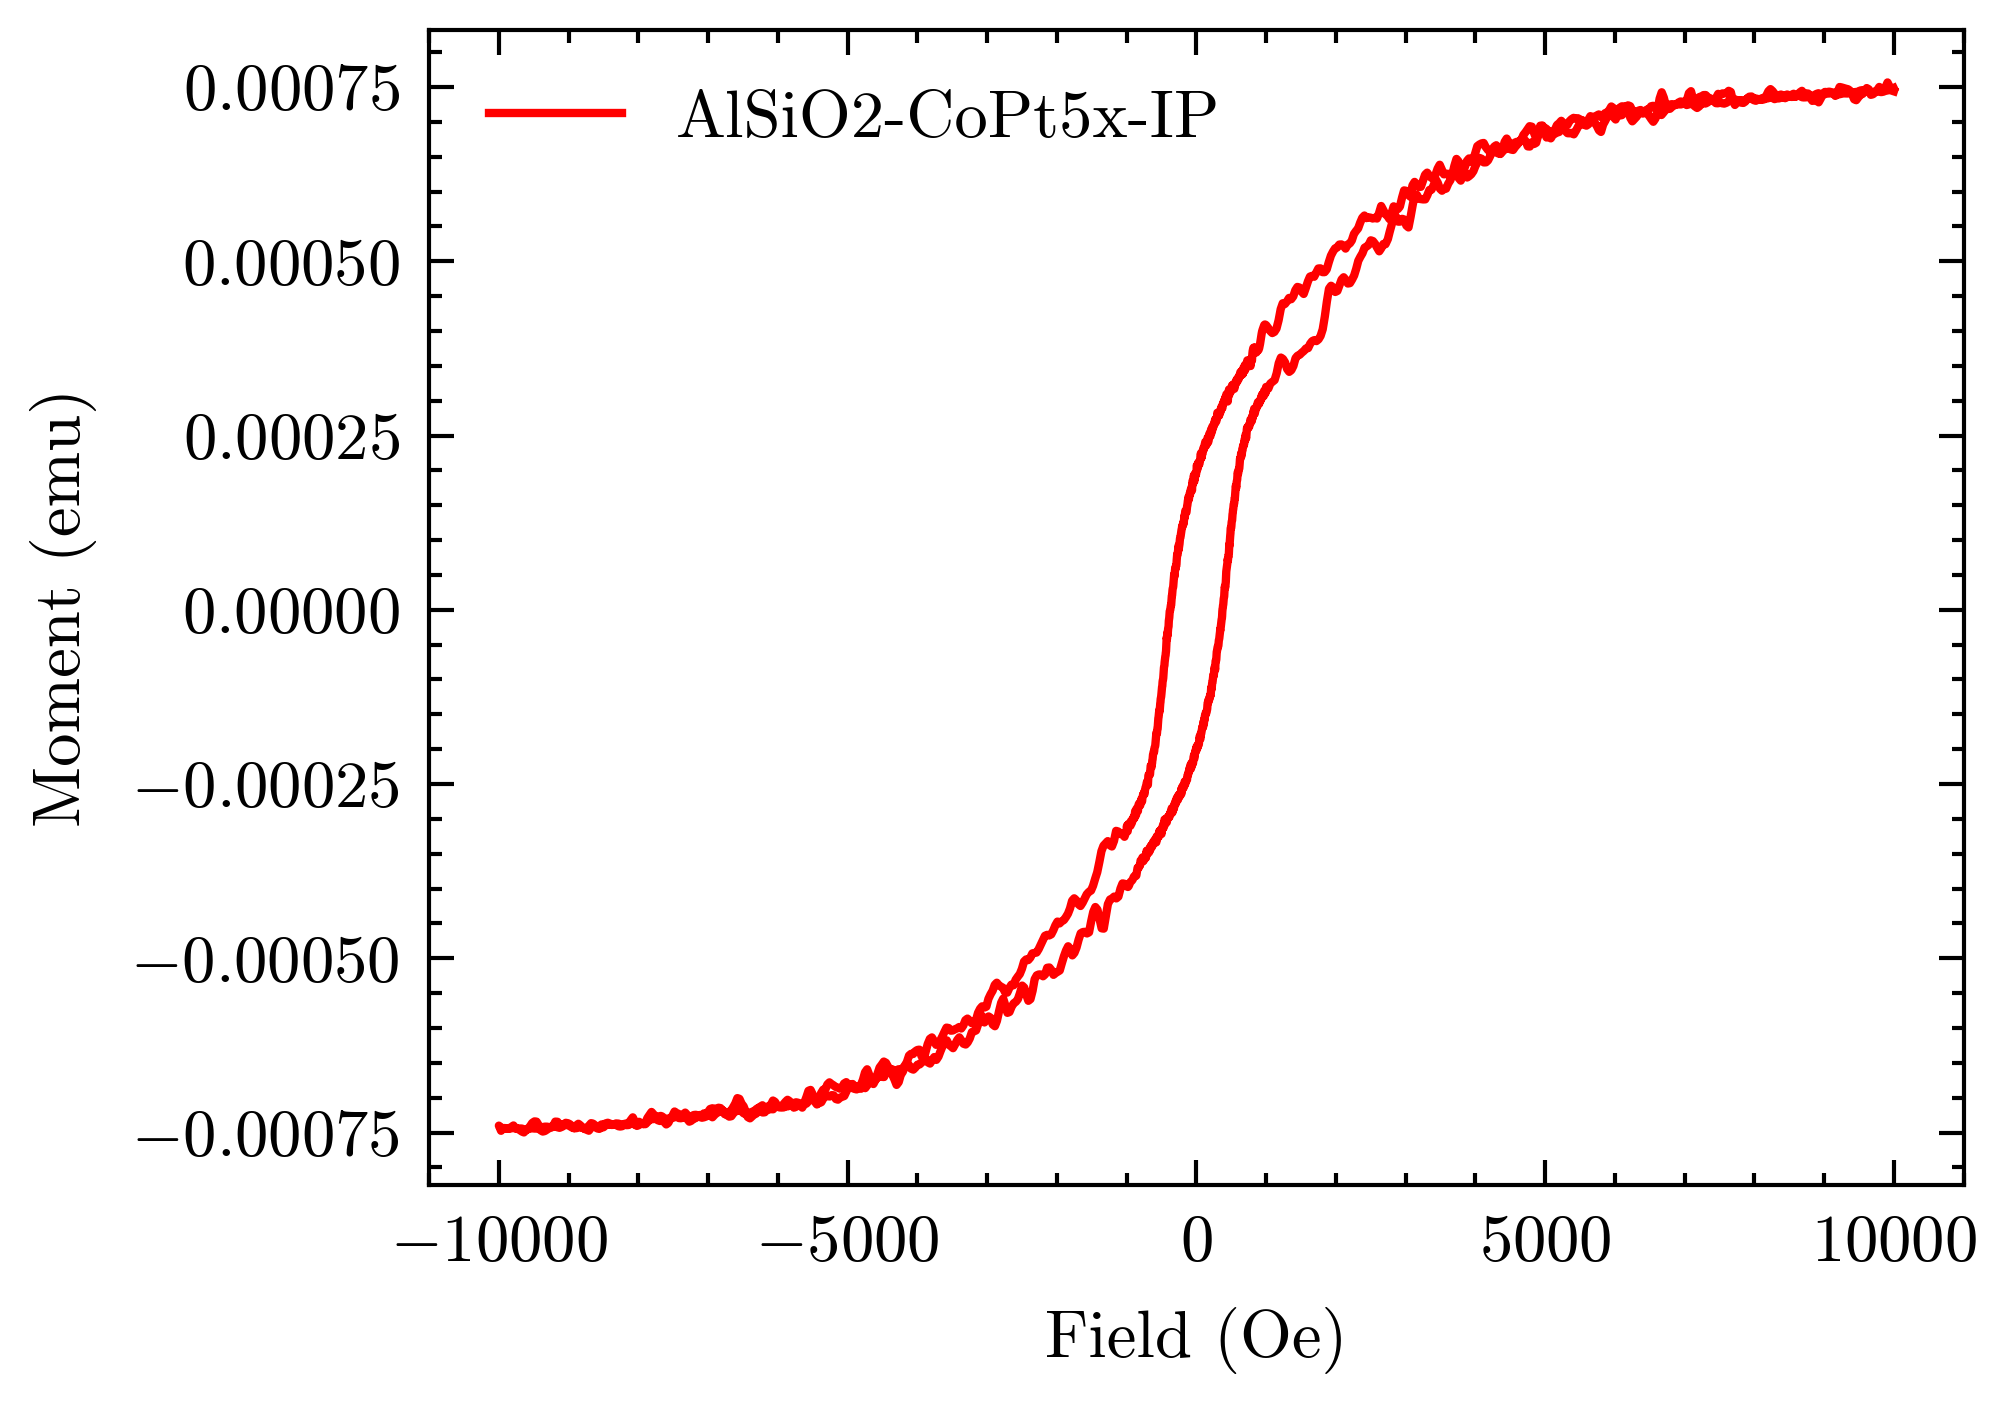

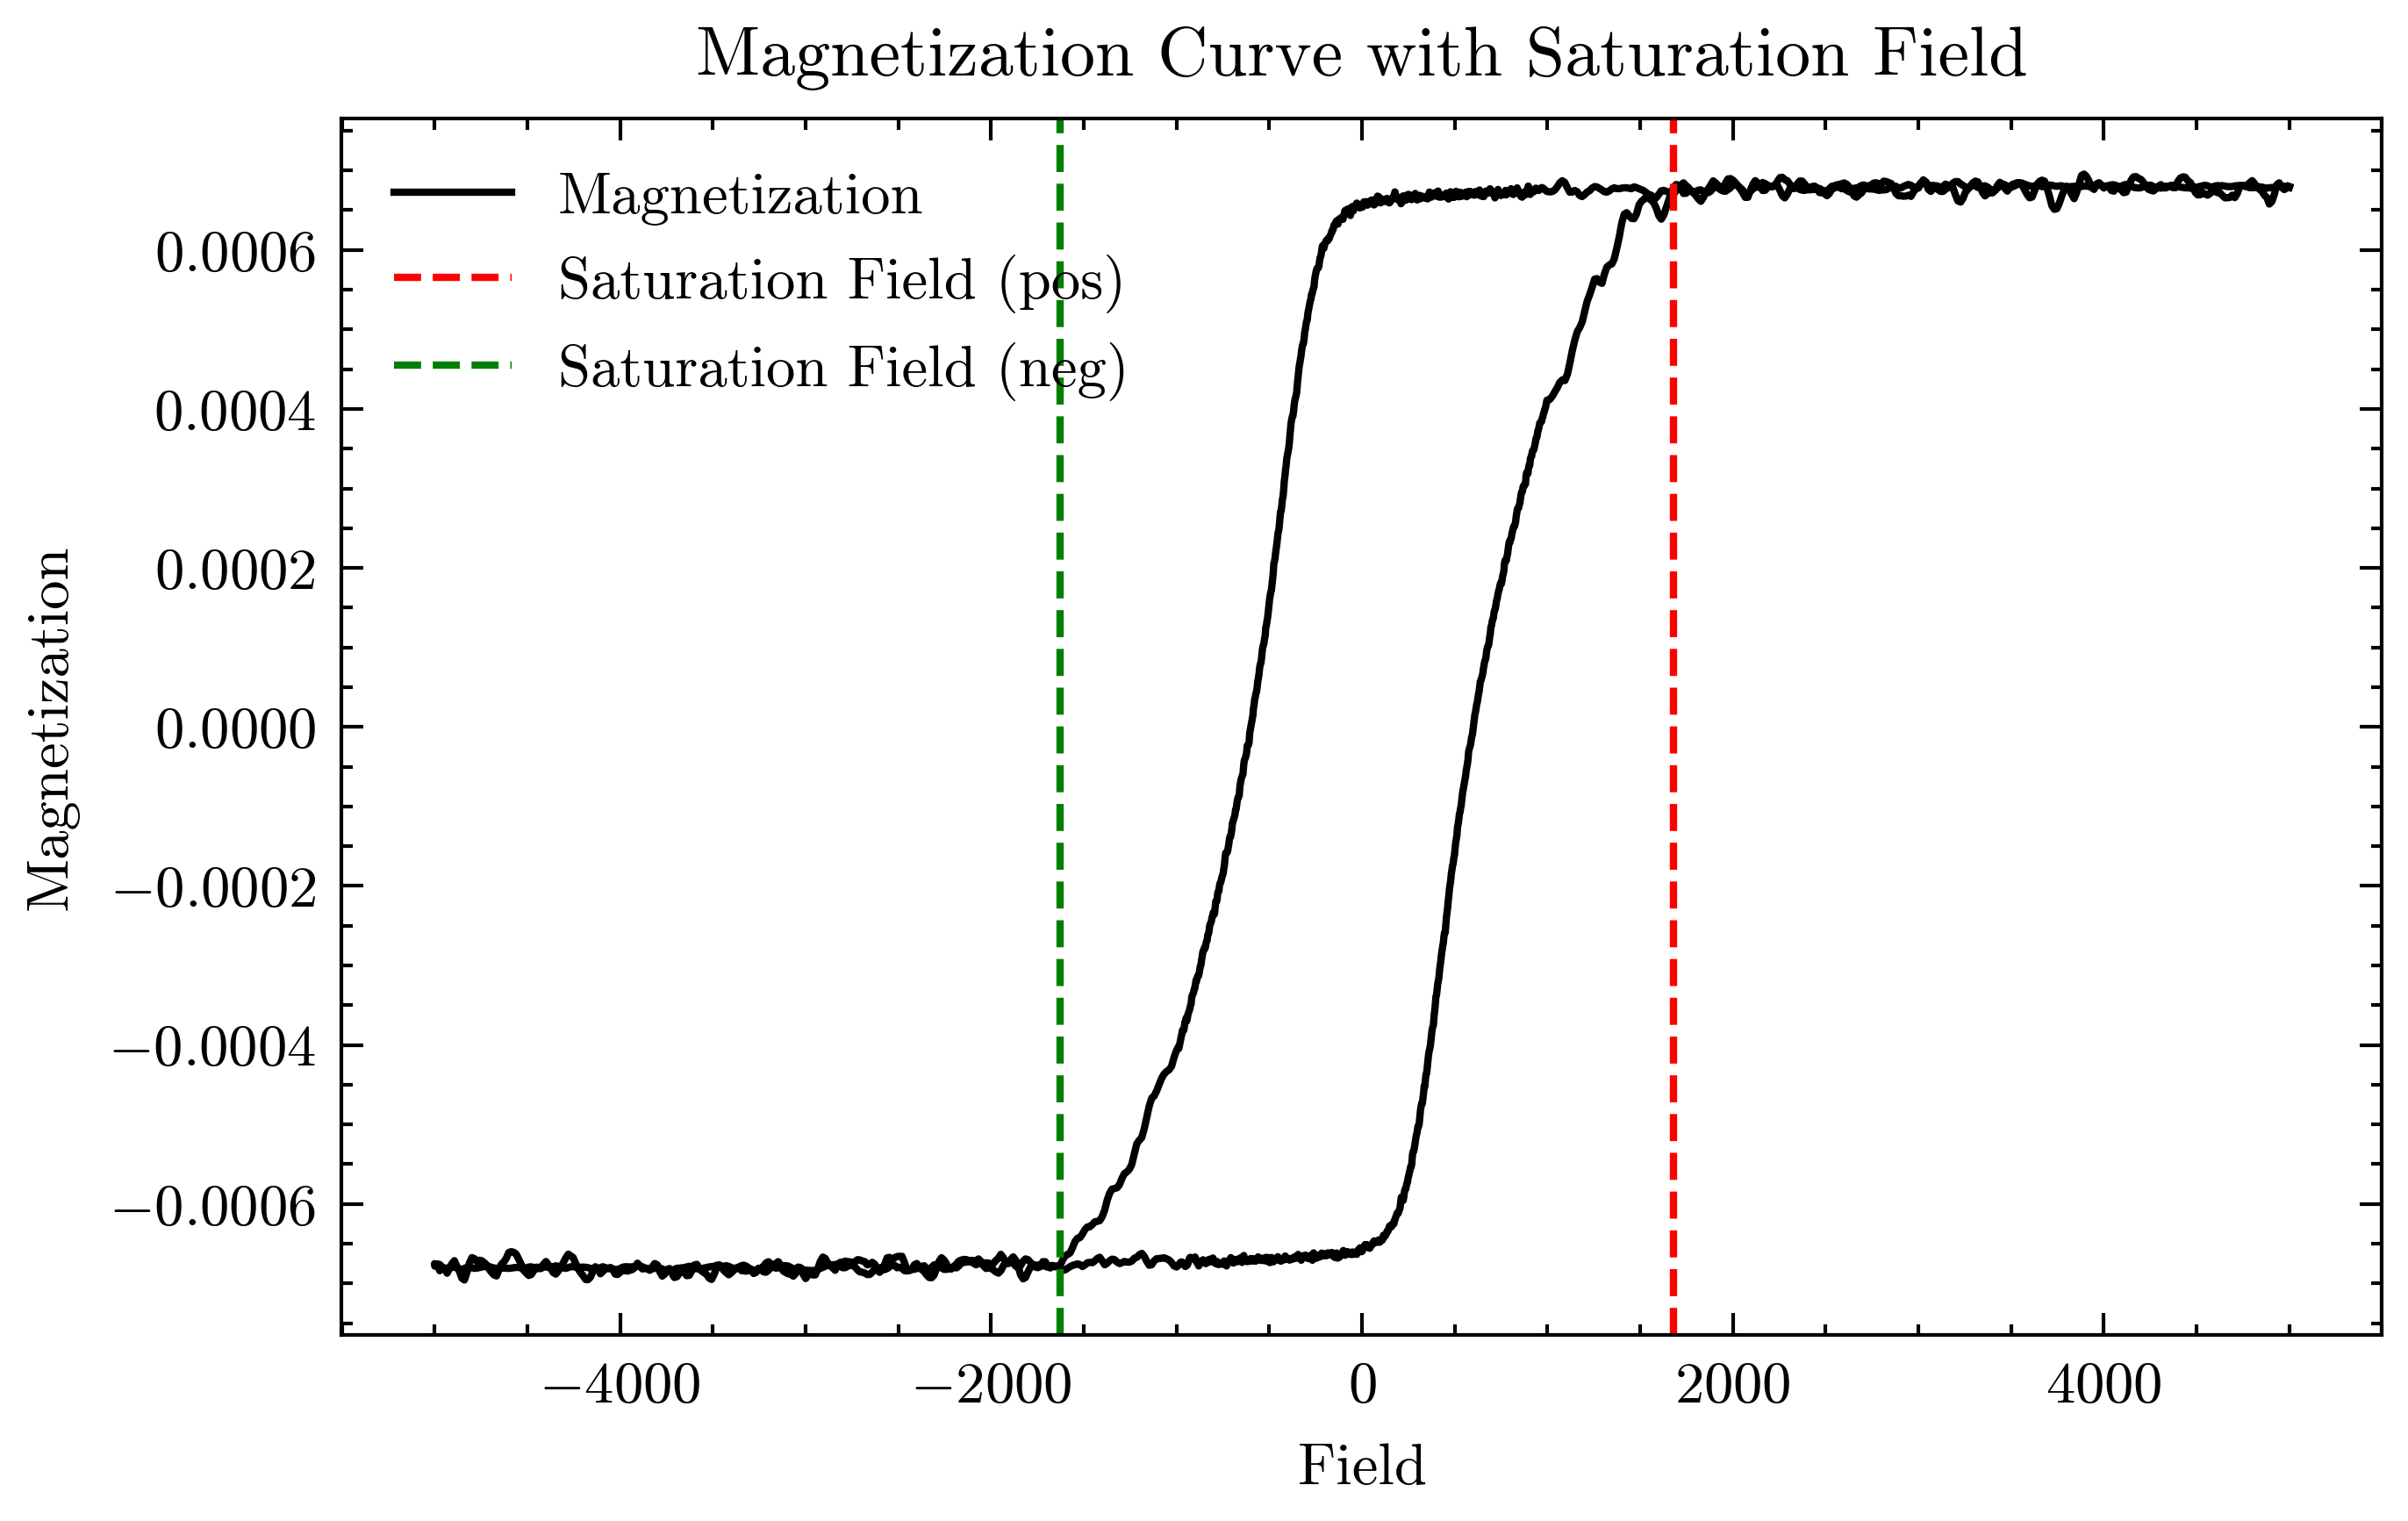

Summary of sample properties: 
 Ms =  1358.7160740826998 
 Hc =  598.4000000000001 
 Hs =  1653.625 

2
Index: 2
Filename: SiSiO2Impsub-Tacap-TaCoPt5xTa-TF-IP_24-10-11-14_43_42
Sample Name: SiSiO2Imp-CoPt5x-IP
Area: 1 cm^2
Thickness: 5e-07
Material: CoPt5x
---
[-5.34327395e-09 -1.02064199e-03] [-6.36884752e-09  1.03387499e-03]


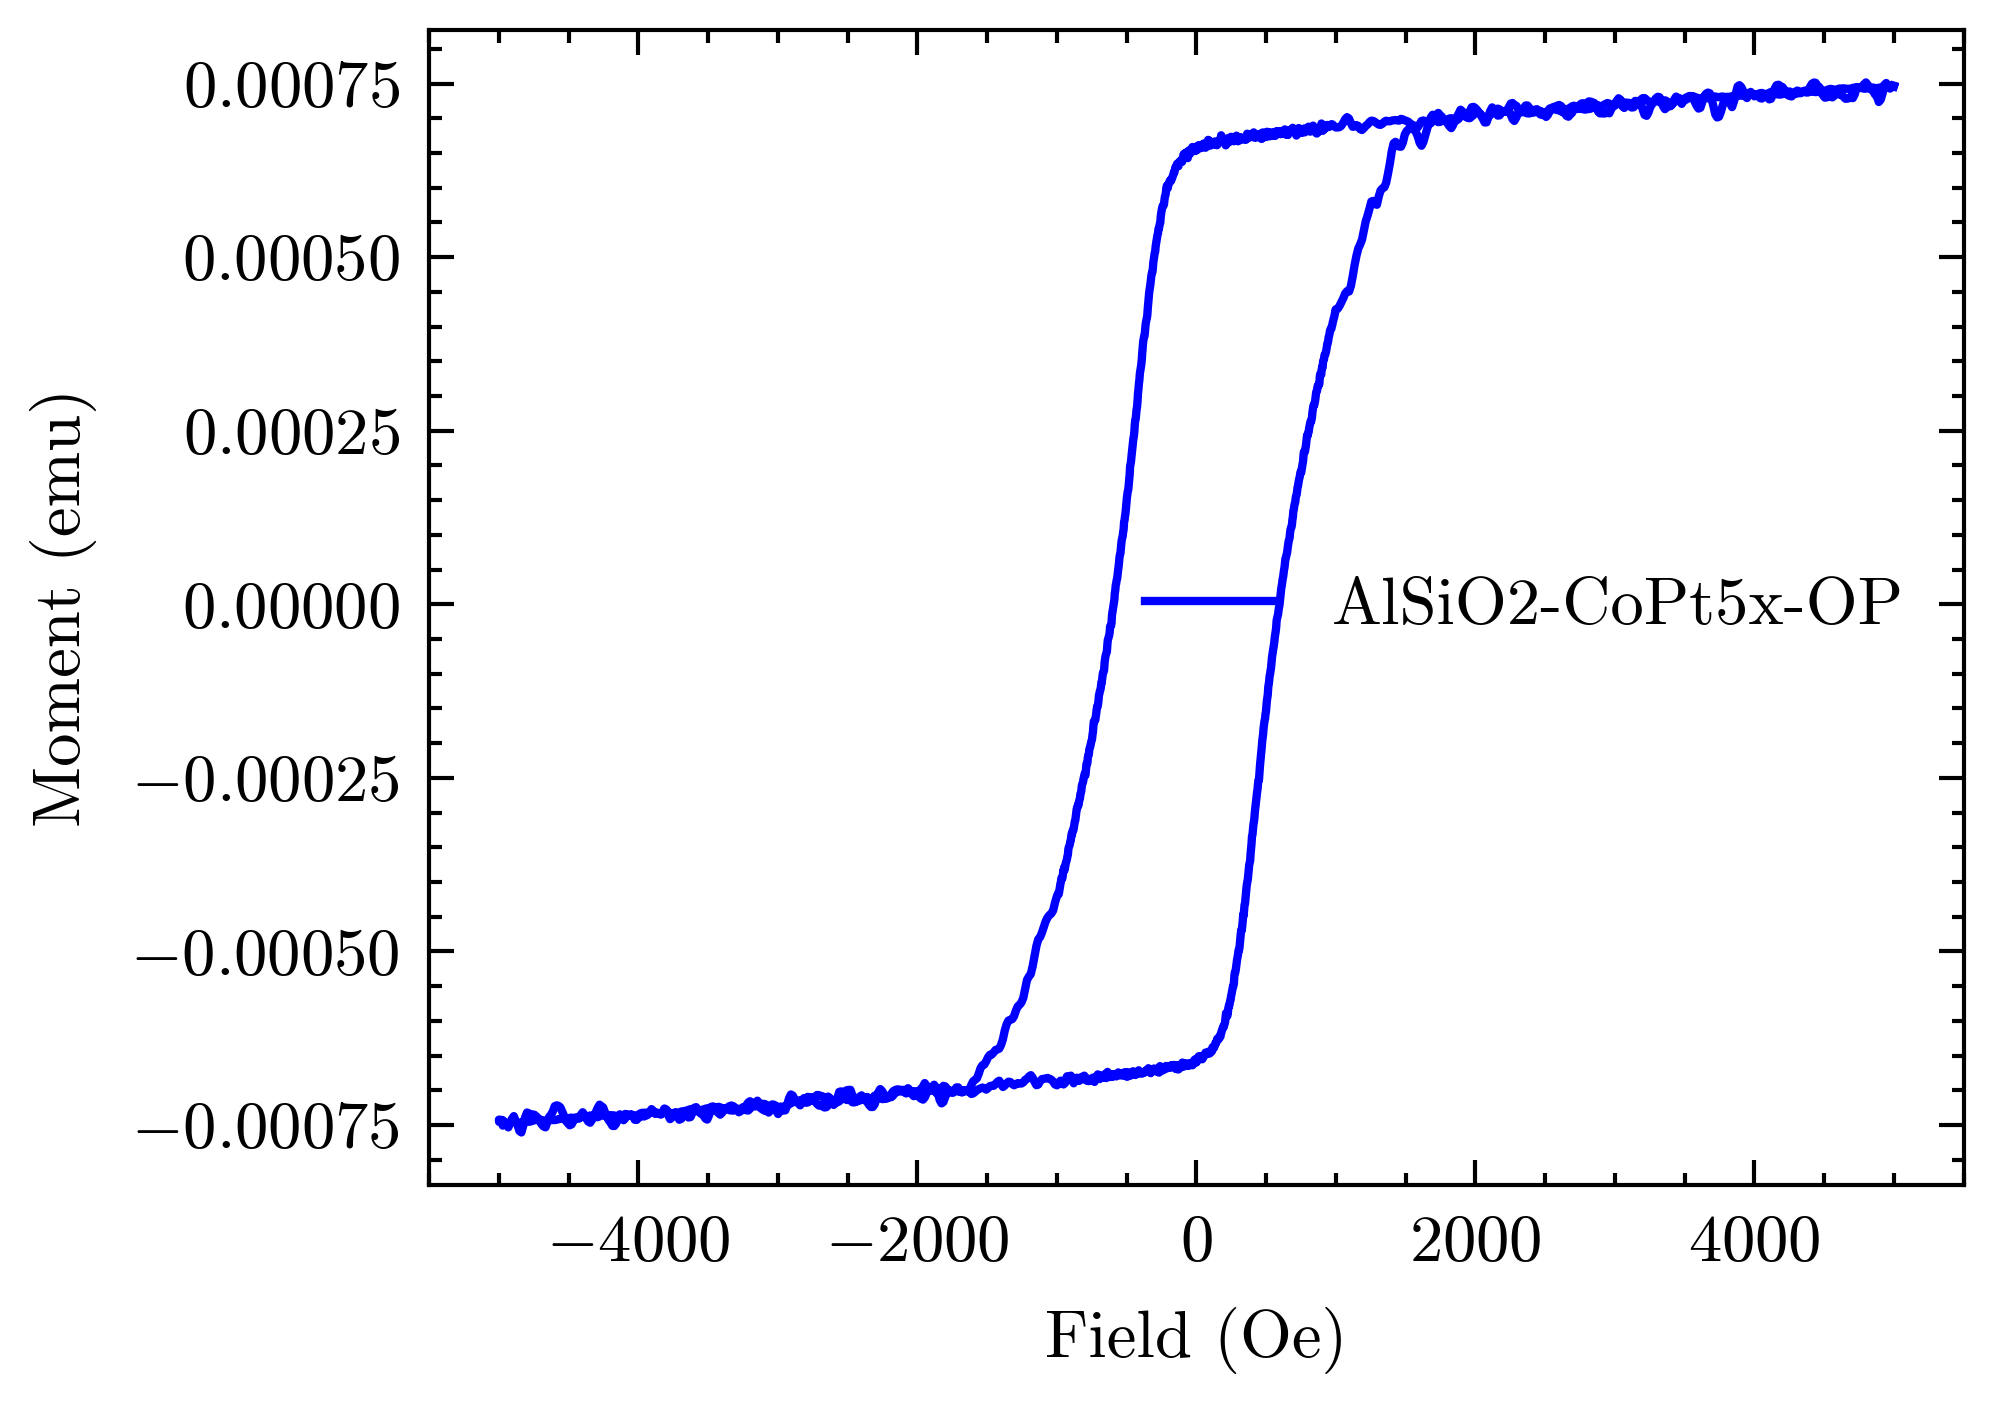

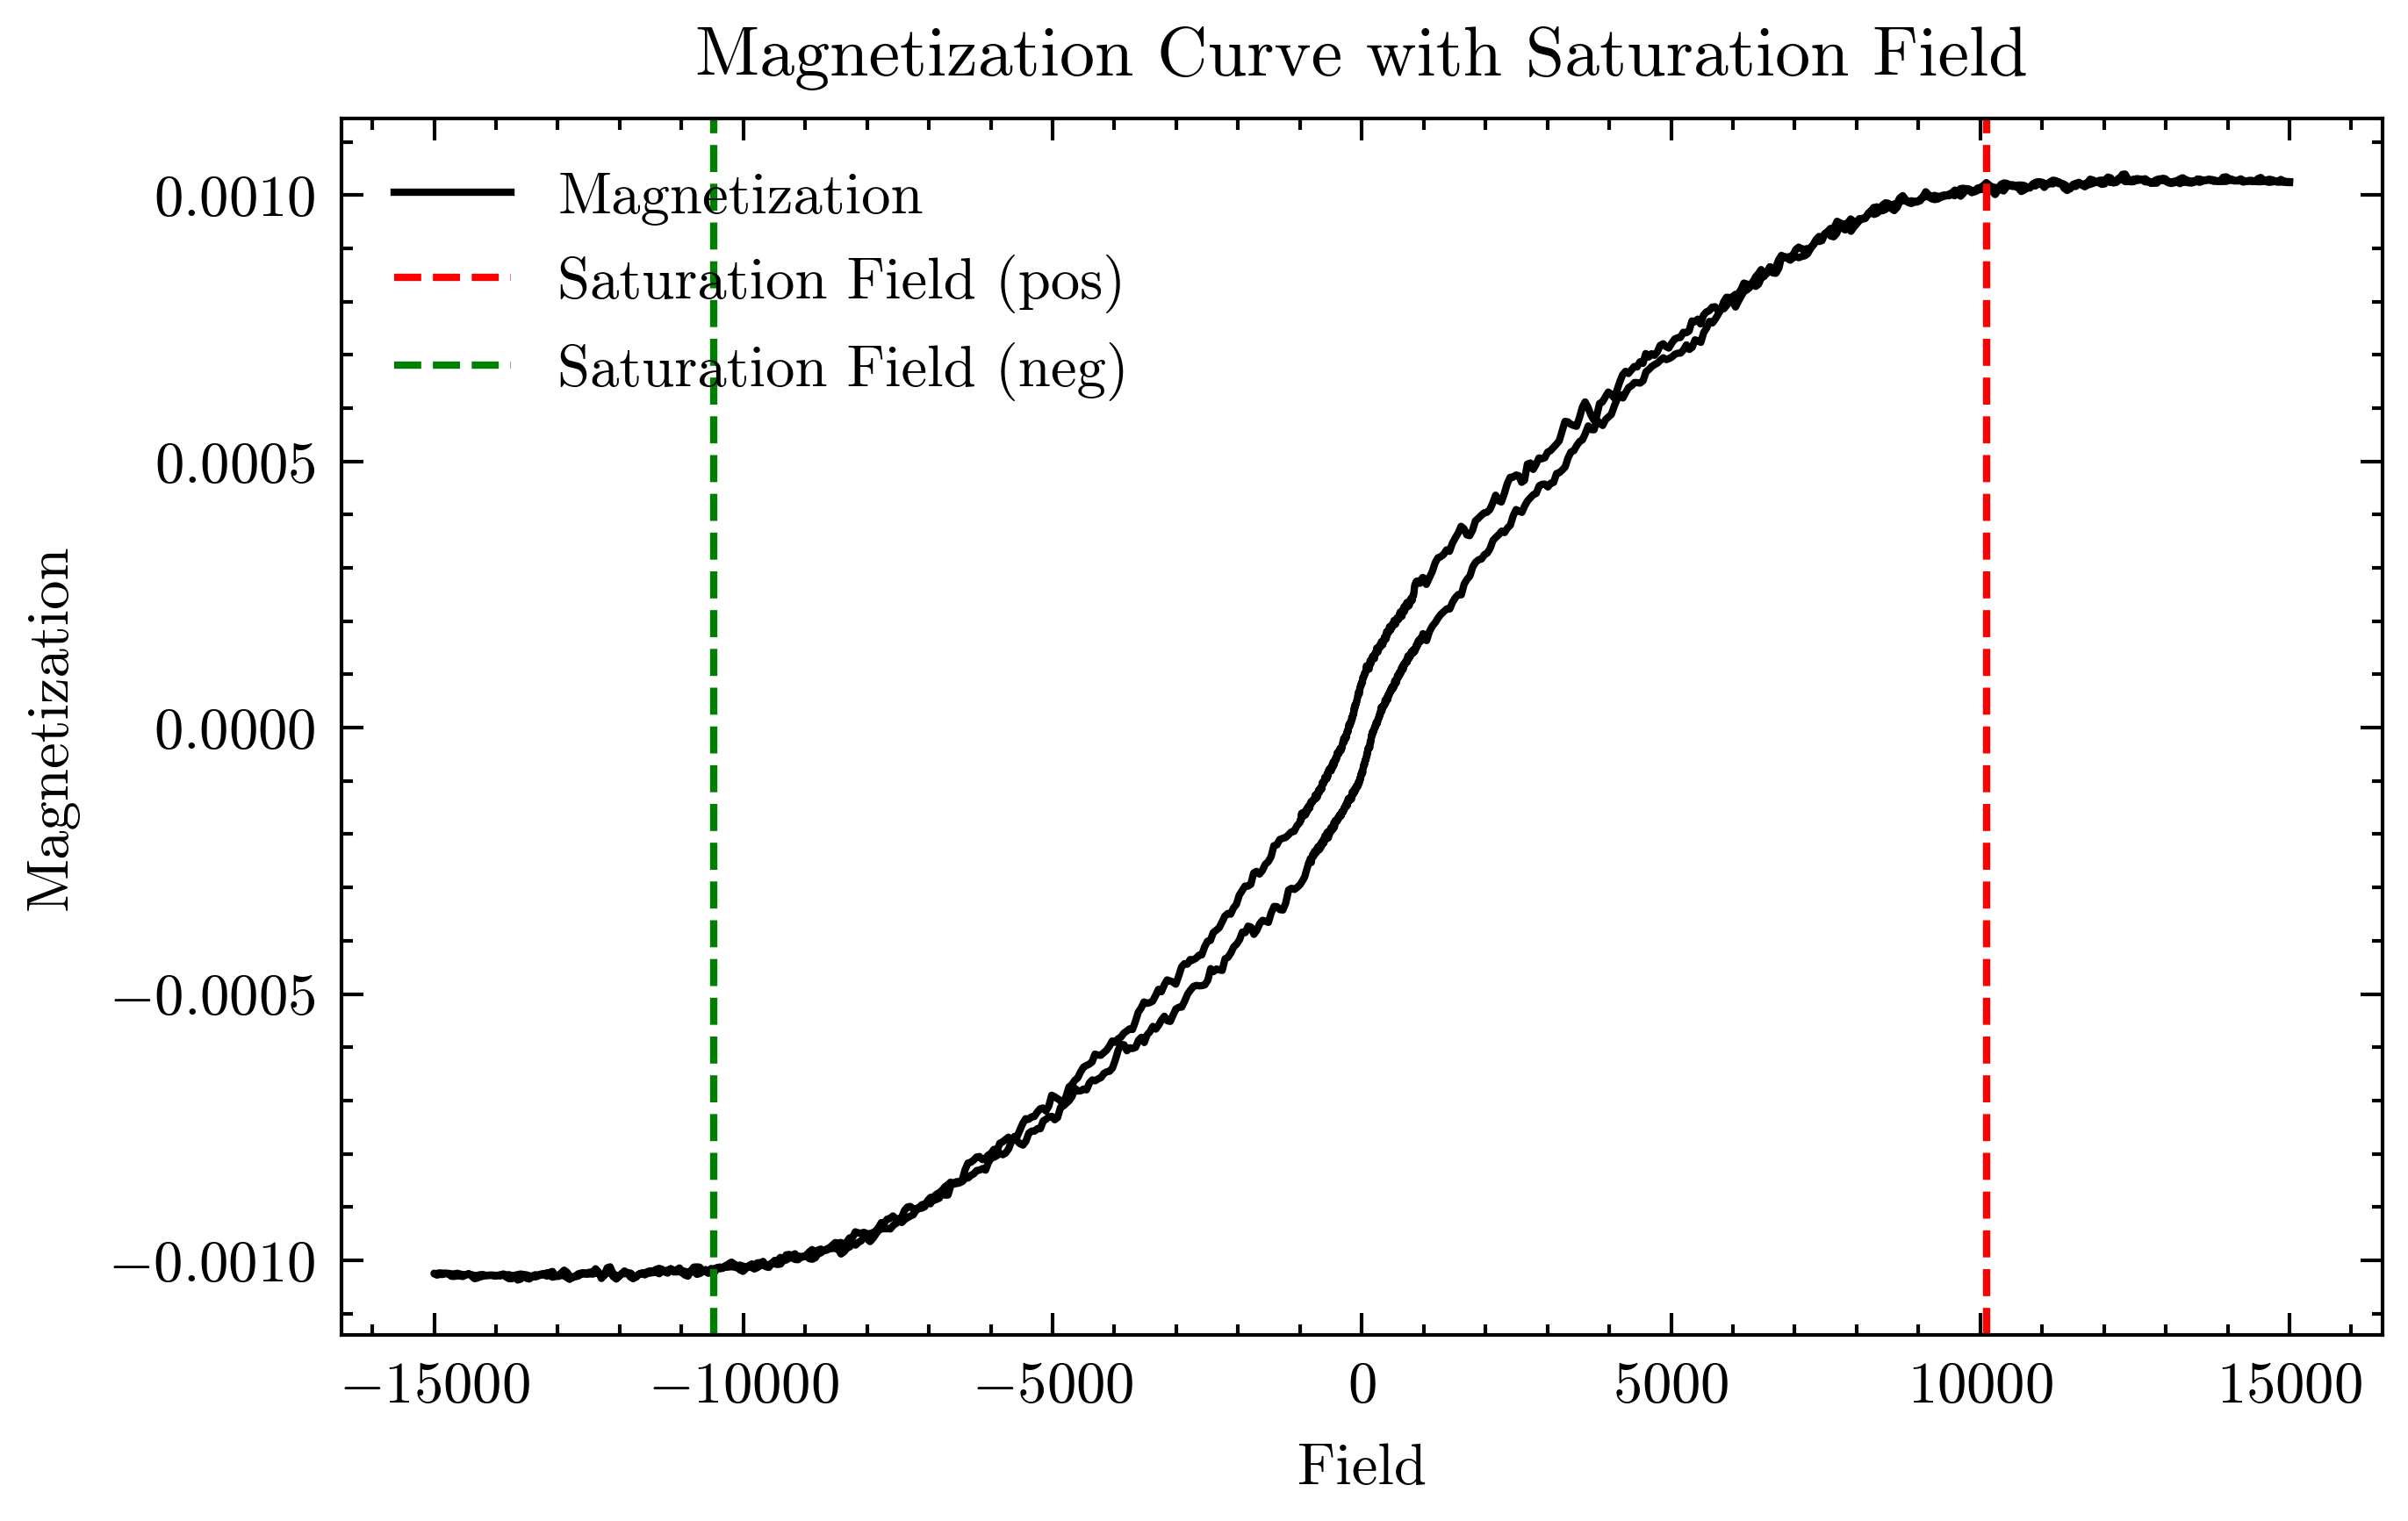

Summary of sample properties: 
 Ms =  2054.516977000642 
 Hc =  213.25666666666666 
 Hs =  10289.77 

3
Index: 3
Filename: SiSiO2Impsub-Tacap-TaCoPt5xTa-TF-OP_24-10-11-14_29_12
Sample Name: SiSiO2Imp-CoPt5x-OP
Area: 1 cm^2
Thickness: 5e-07
Material: CoPt5x
---
[ 8.11687742e-09 -8.92692953e-04] [7.23777791e-09 8.95250009e-04]


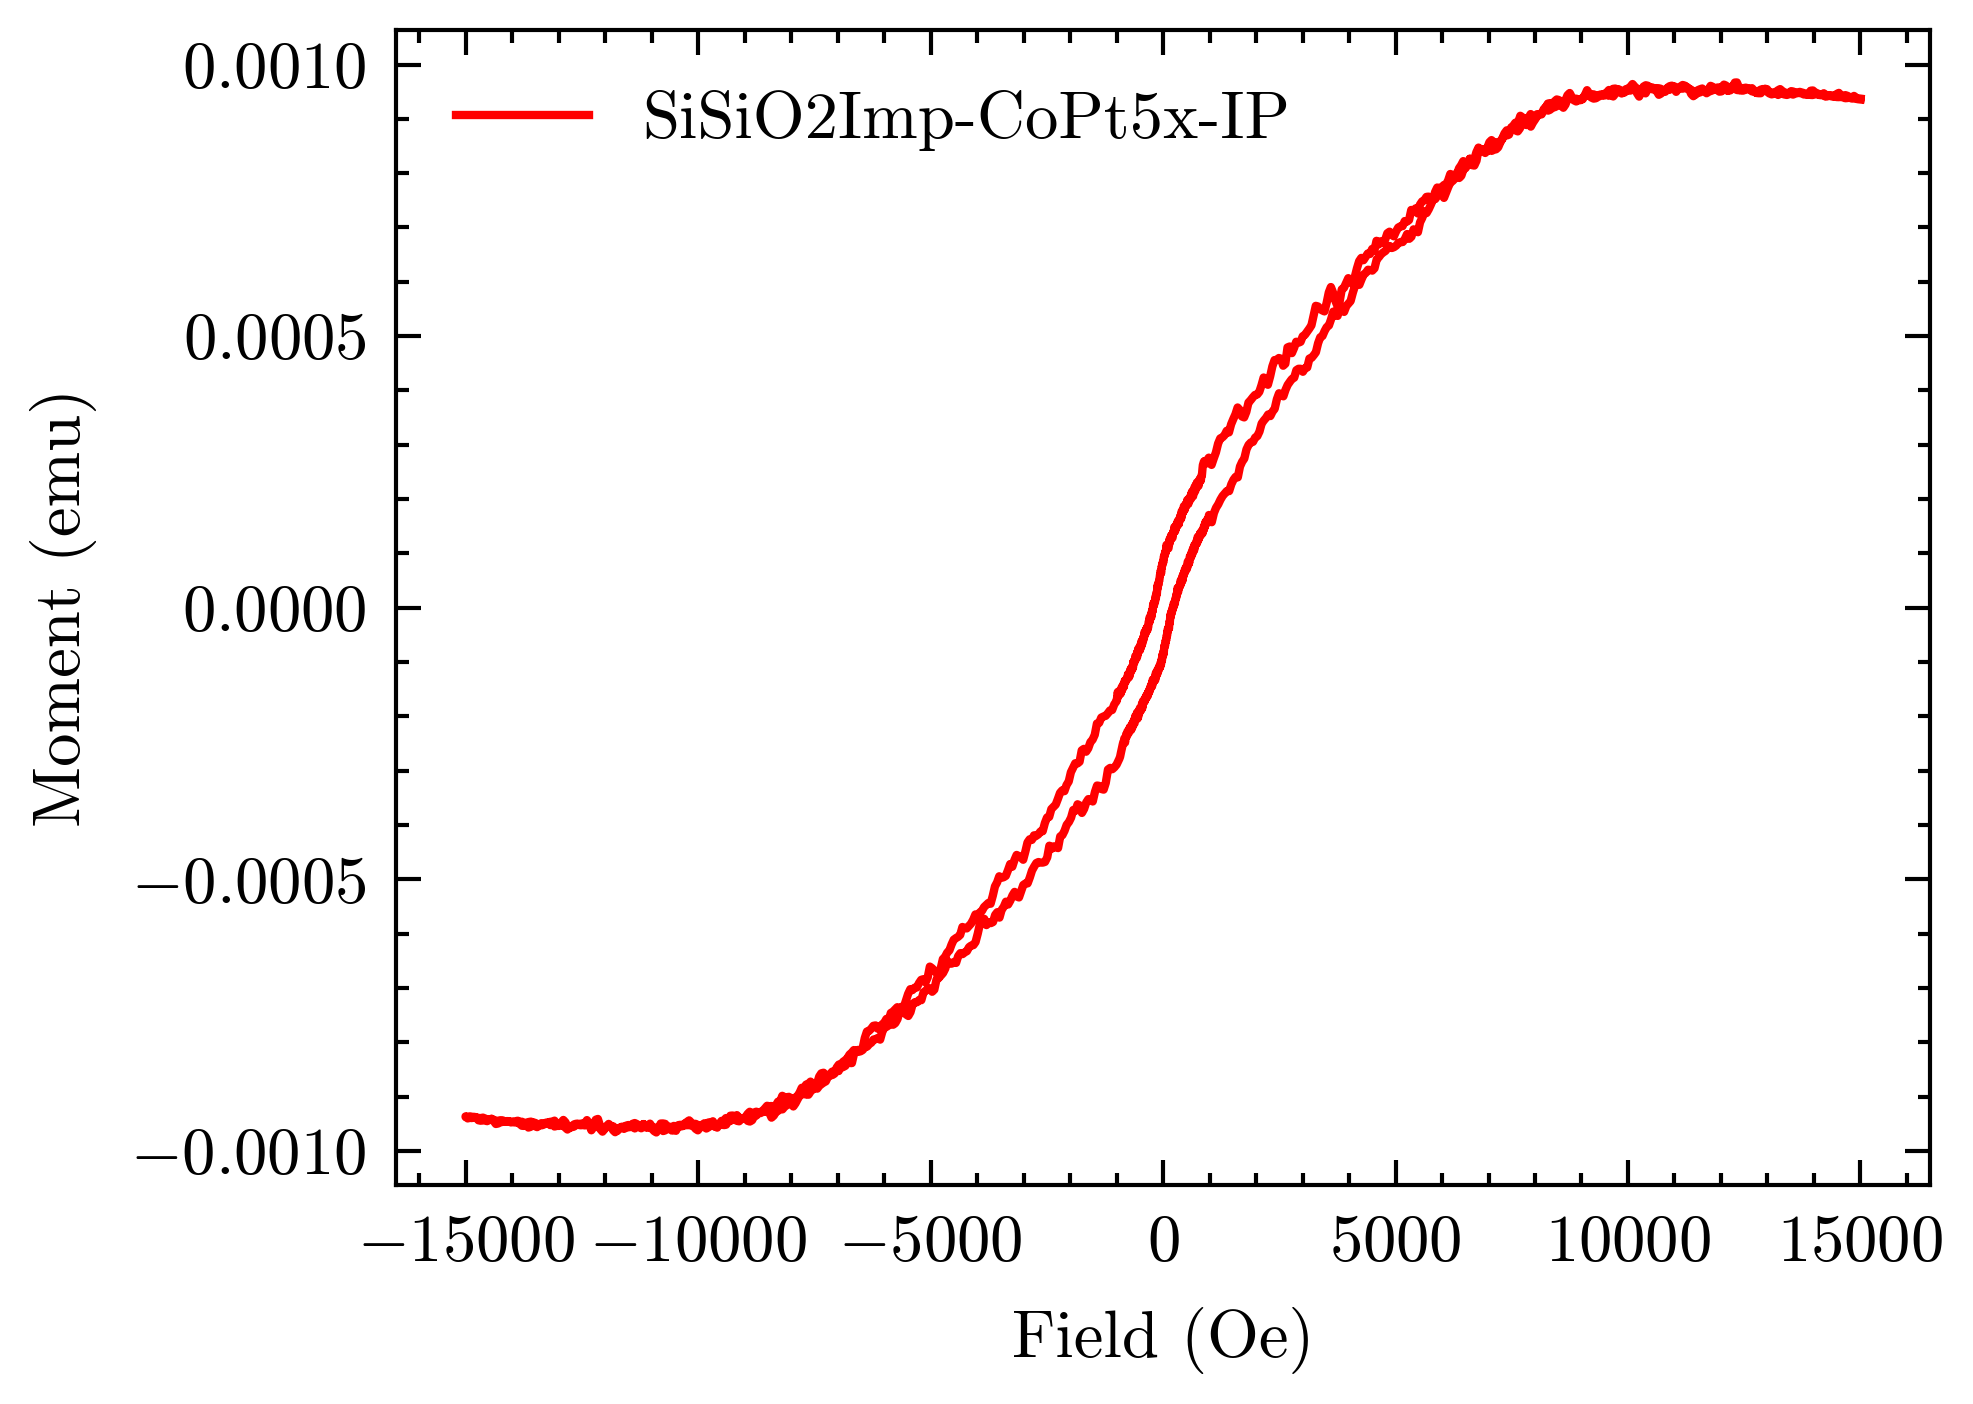

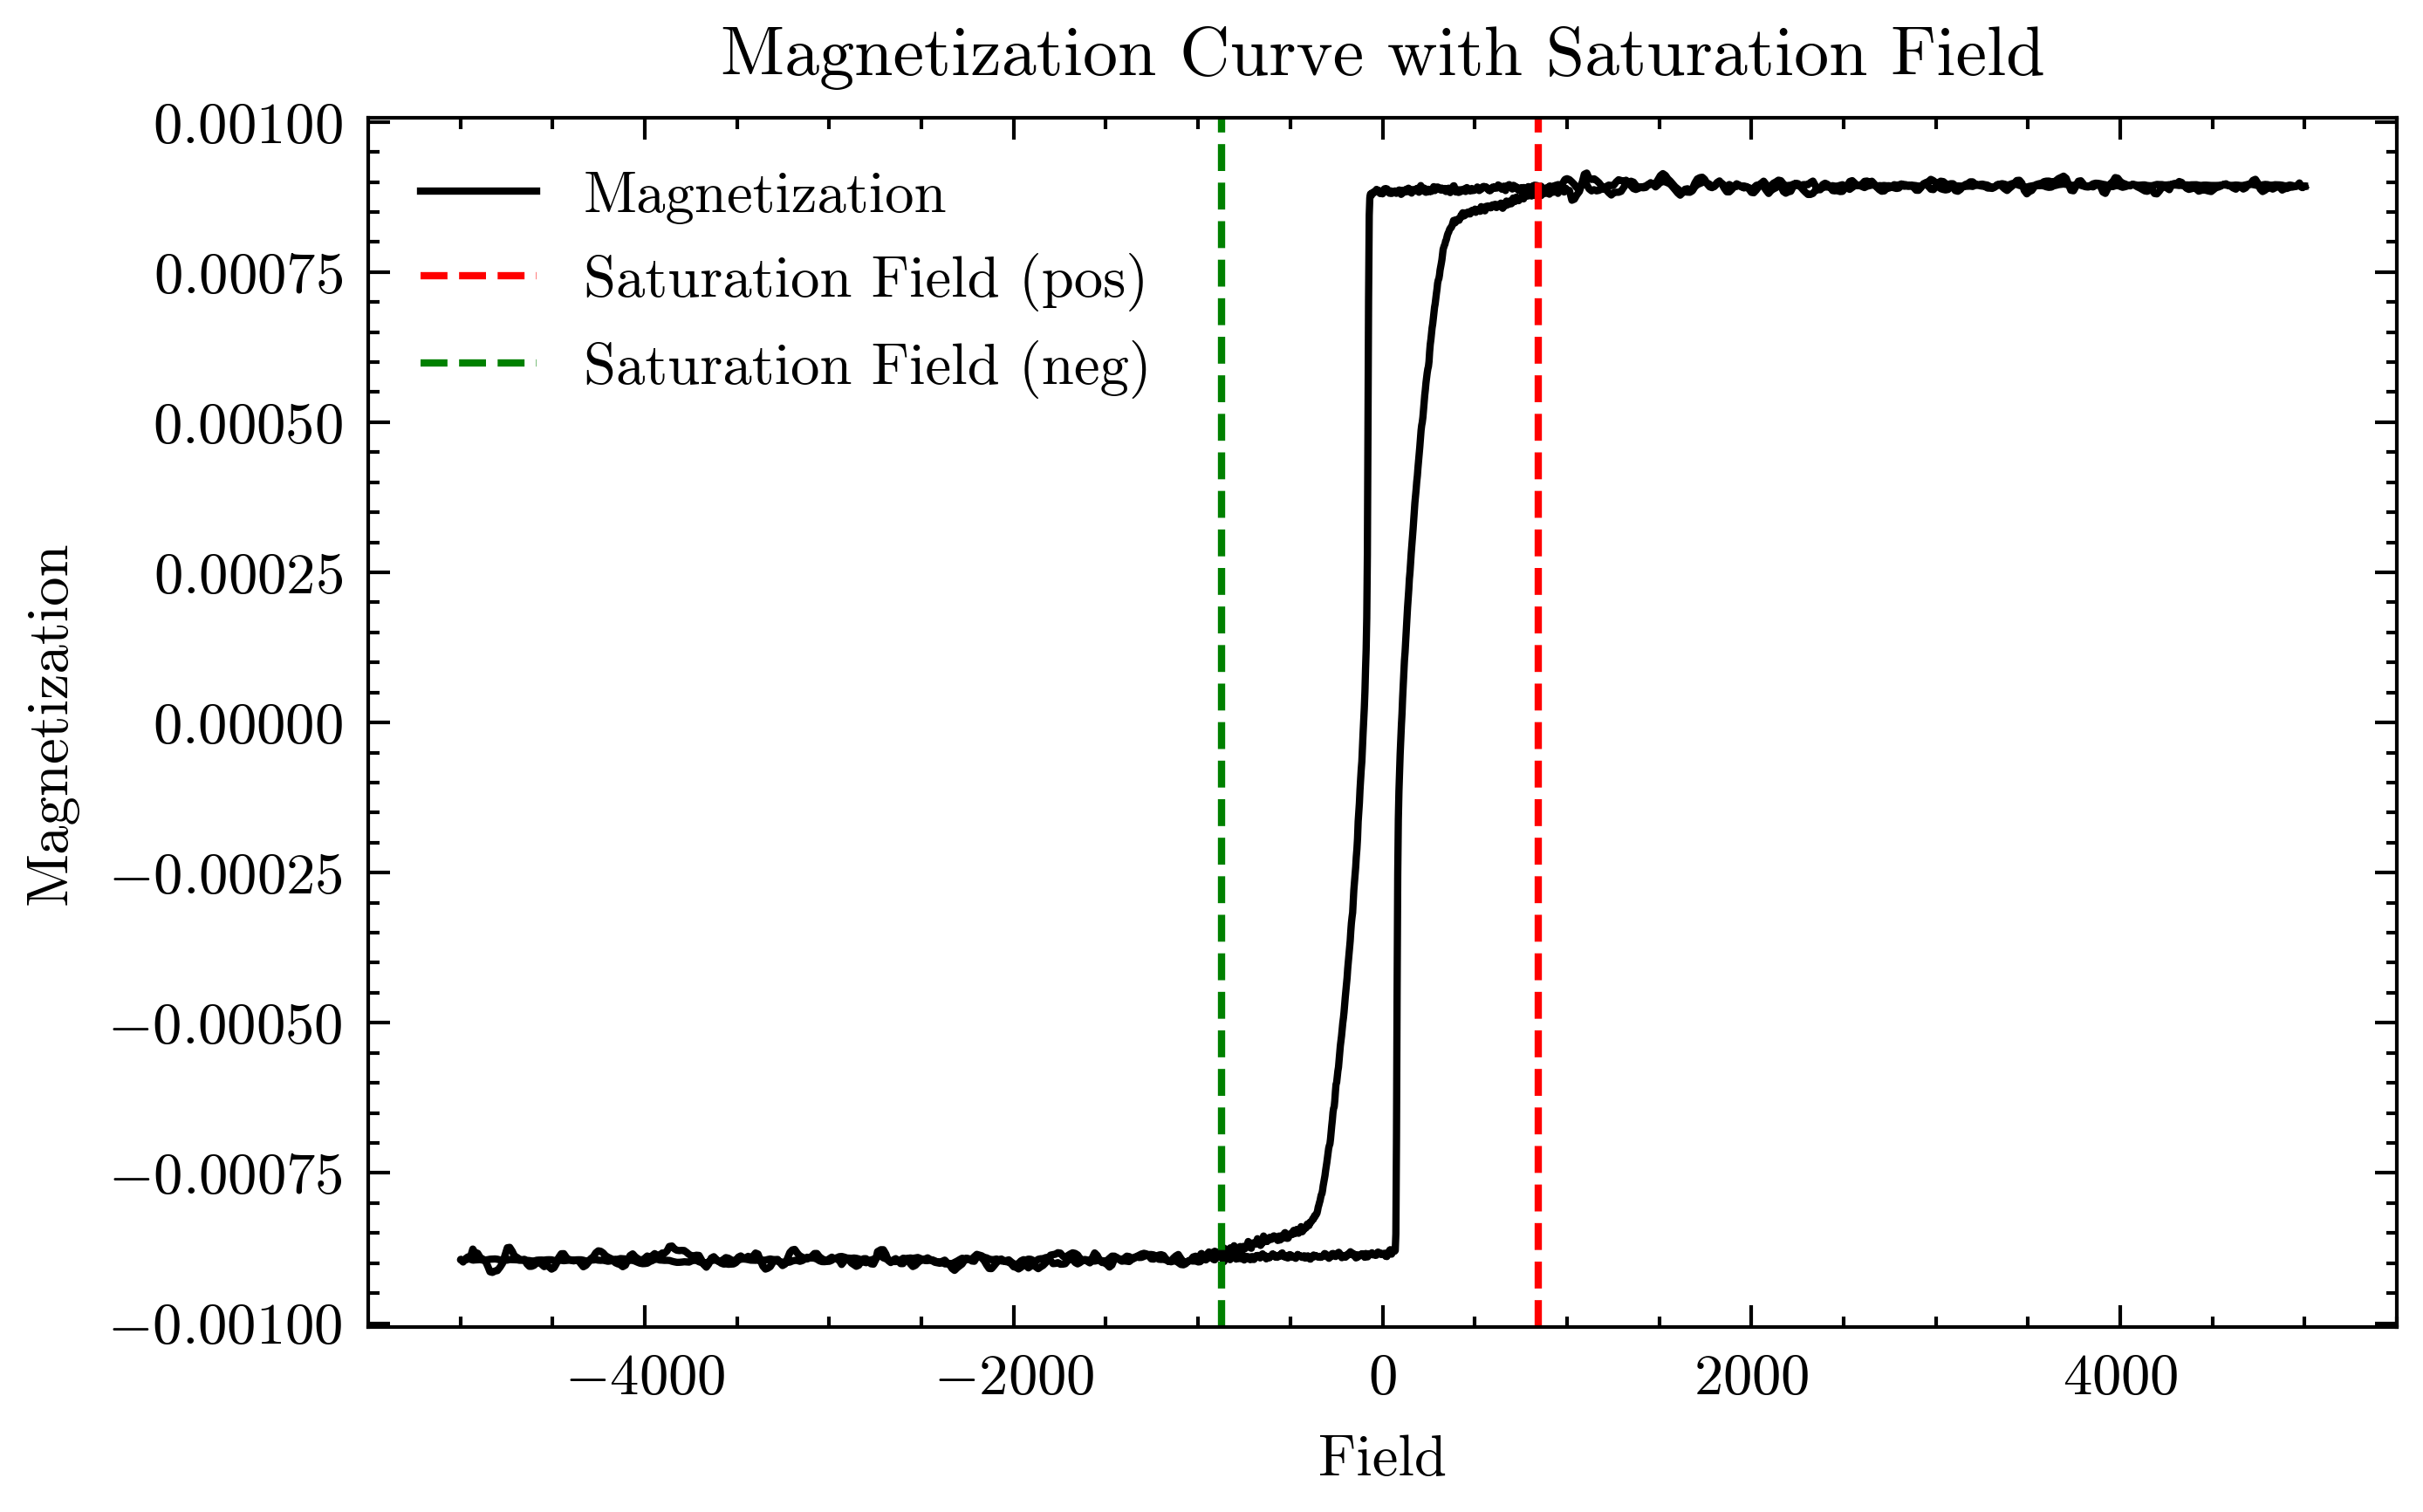

Summary of sample properties: 
 Ms =  1787.9429620404007 
 Hc =  102.275 
 Hs =  859.915 



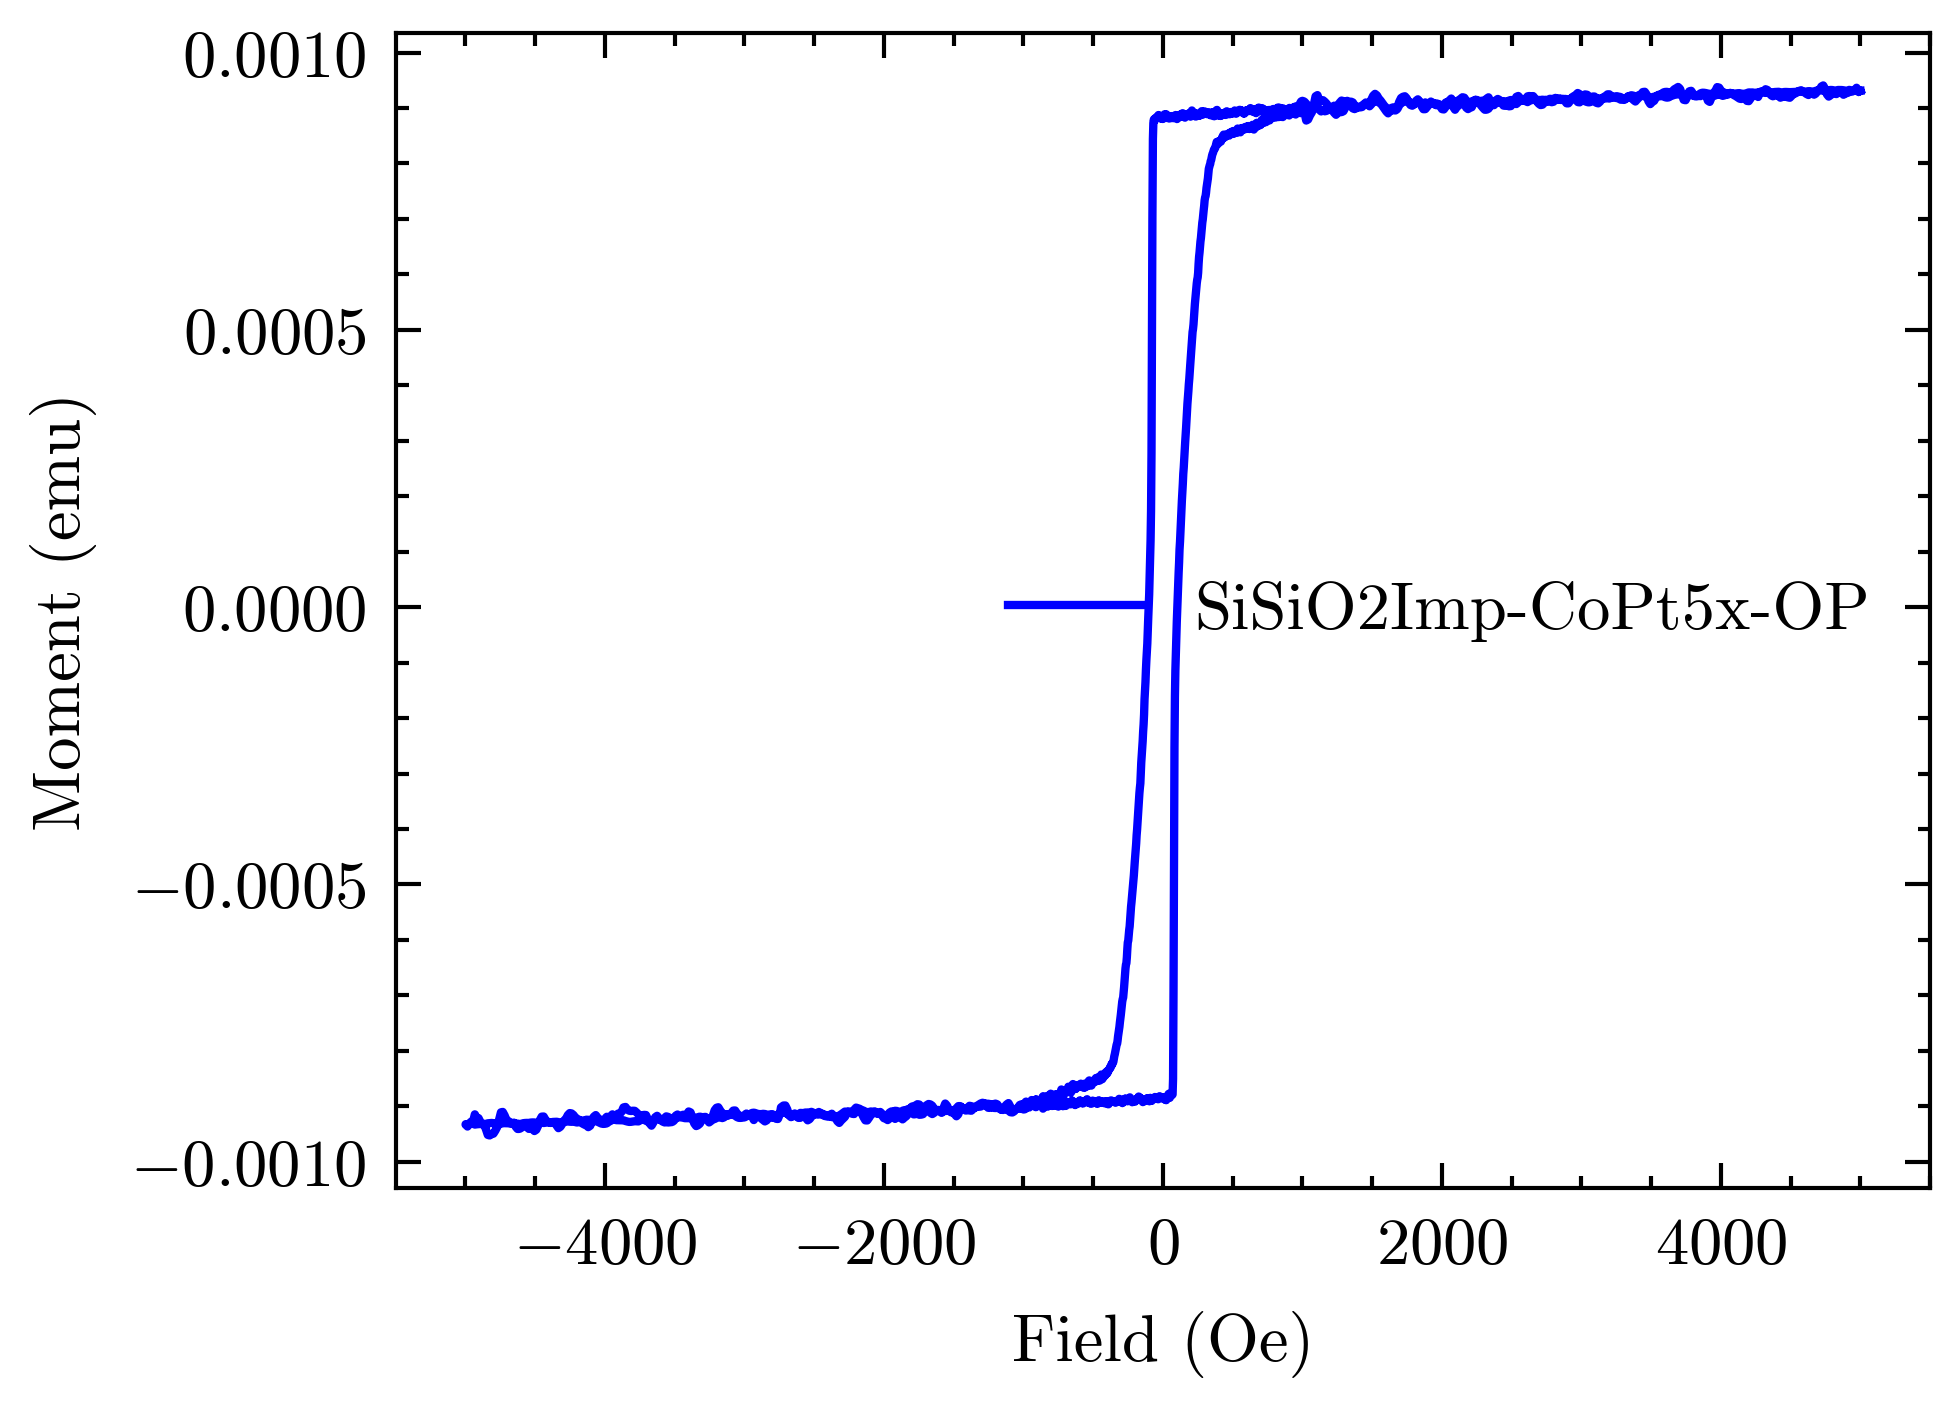

In [12]:
data_folder = r'C:\Users\jc2713\OneDrive - Imperial College London (1)\Tohoku - pump priming\Data\VSM\091024-CoPt-withTacap-TF'

import vsmpy
import matplotlib.pyplot as plt
from importlib import reload
reload(vsmpy)

sample_areas = [1,
1] # In cm^2

sample_thickness = [5e-7,
5e-7]

sample_materials = ['CoPt5x','CoPt5x','CoPt5x','CoPt5x']
sample_filenames = [r'Alsub-Tacap-TaCoPt5xTa-TF-IP_24-10-11-14_12_09',
                    r'Alsub-Tacap-TaCoPt5xTa-TF-OP_24-10-11-14_00_21',
                    r'SiSiO2Impsub-Tacap-TaCoPt5xTa-TF-IP_24-10-11-14_43_42',
                    r'SiSiO2Impsub-Tacap-TaCoPt5xTa-TF-OP_24-10-11-14_29_12'
                    ]

sample_names = ['AlSiO2-CoPt5x-IP','AlSiO2-CoPt5x-OP','SiSiO2Imp-CoPt5x-IP','SiSiO2Imp-CoPt5x-OP']

samples = {}

for i, (filename, name) in enumerate(zip(sample_filenames, sample_names)):
    print(i)
    property_index = i // 2  # Integer division to get the correct index for area, thickness, and material
    
    area = sample_areas[property_index]
    thickness = sample_thickness[property_index]
    material = sample_materials[property_index]

    print(f"Index: {i}")
    print(f"Filename: {filename}")
    print(f"Sample Name: {name}")
    print(f"Area: {area} cm^2")
    print(f"Thickness: {thickness}")
    print(f"Material: {material}")
    print("---")


    samples[str(i)] = vsmpy.VSMAnalyzer(mass=1, volume=area*thickness, 
                            material=material, folder=data_folder,
                            filename=filename+'.VSM',
                            sample_name=name)
    if 'IP' in name:
        field_thres = 9000
    else:
        field_thres = 2500
    if 'SiSiO2Imp-CoPt5x-IP' in name:
        field_thres = 12000
    samples[str(i)].read_data()
    samples[str(i)].fit_background(field_thres)
    samples[str(i)].scale_data()
    samples[str(i)].find_coercive_field()
    samples[str(i)].calculate_saturation_magnetization()
    samples[str(i)].determine_saturation_field(plot=True)
    fig,ax = plt.subplots(1,1)
    if 'IP' in name: 
        samples[str(i)].plot_data(ax, name, ['raw'], color = 'red')
    if 'OP' in name: 
        samples[str(i)].plot_data(ax, name, ['raw'], color = 'blue')
    print('Summary of sample properties:', '\n', 'Ms = ',samples[str(i)].saturation_magnetization_volume,'\n','Hc = ', samples[str(i)].coercive_field,'\n', 'Hs = ',samples[str(i)].saturation_field,'\n')
   

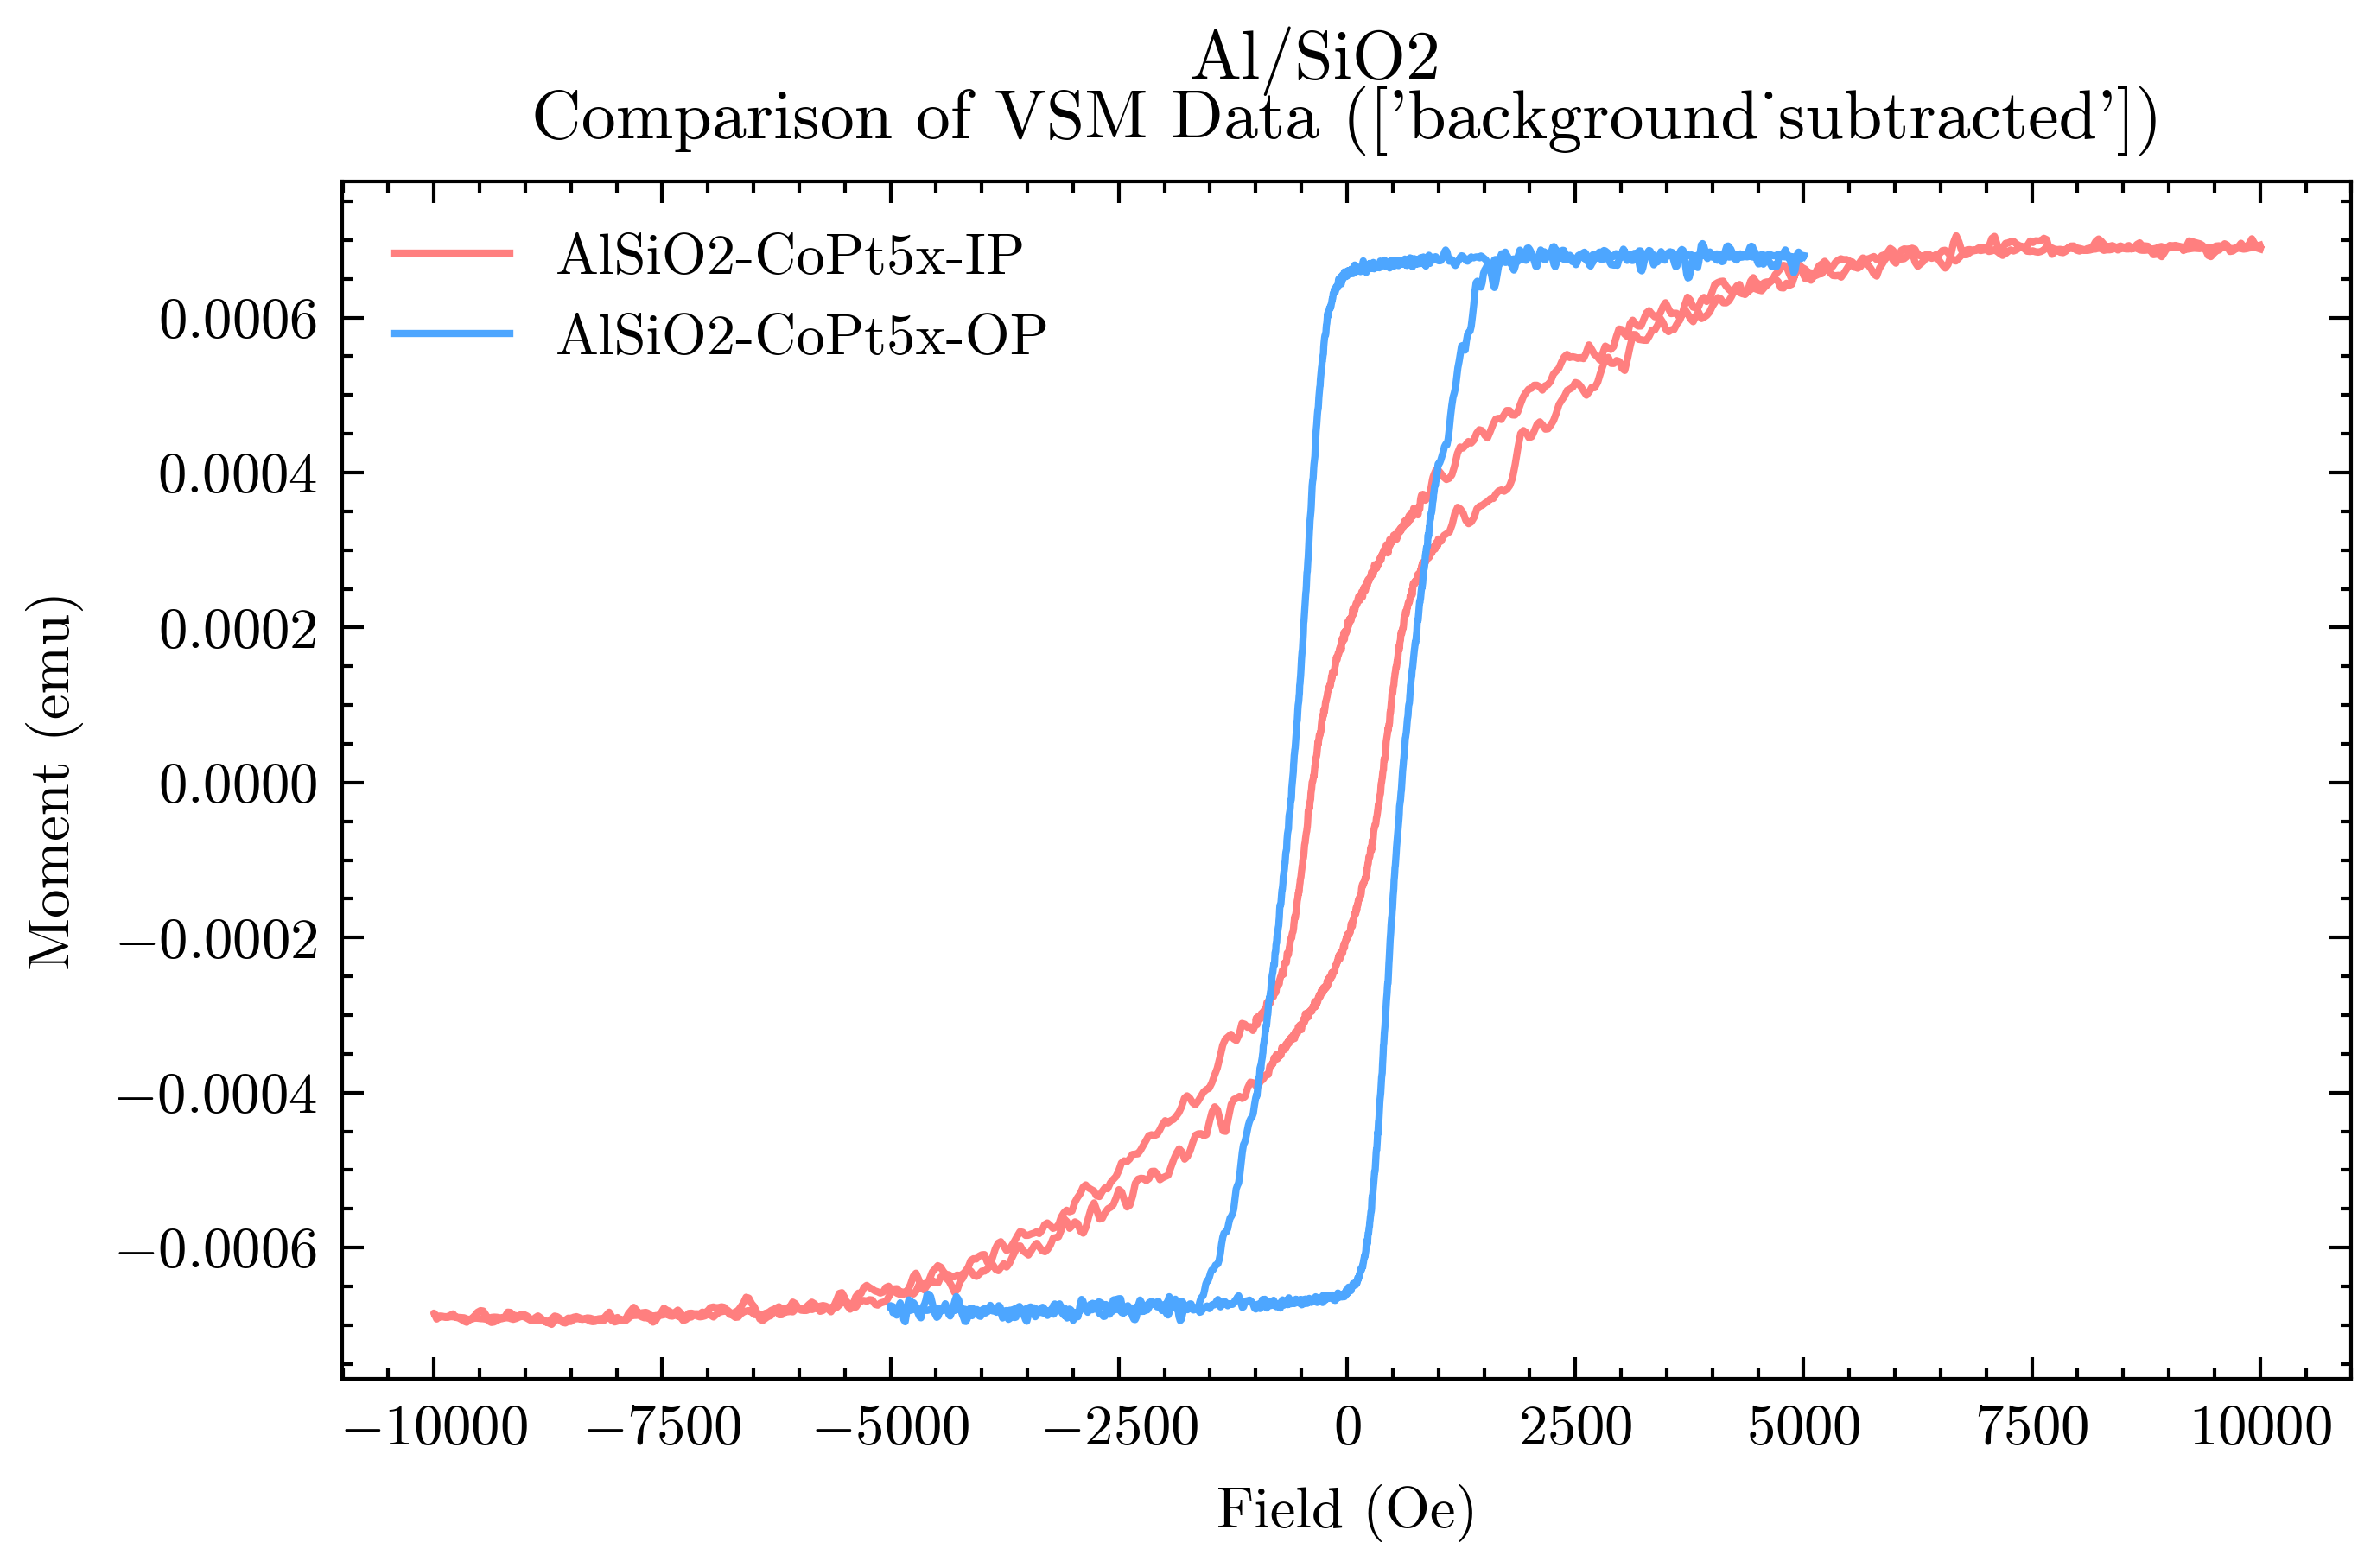

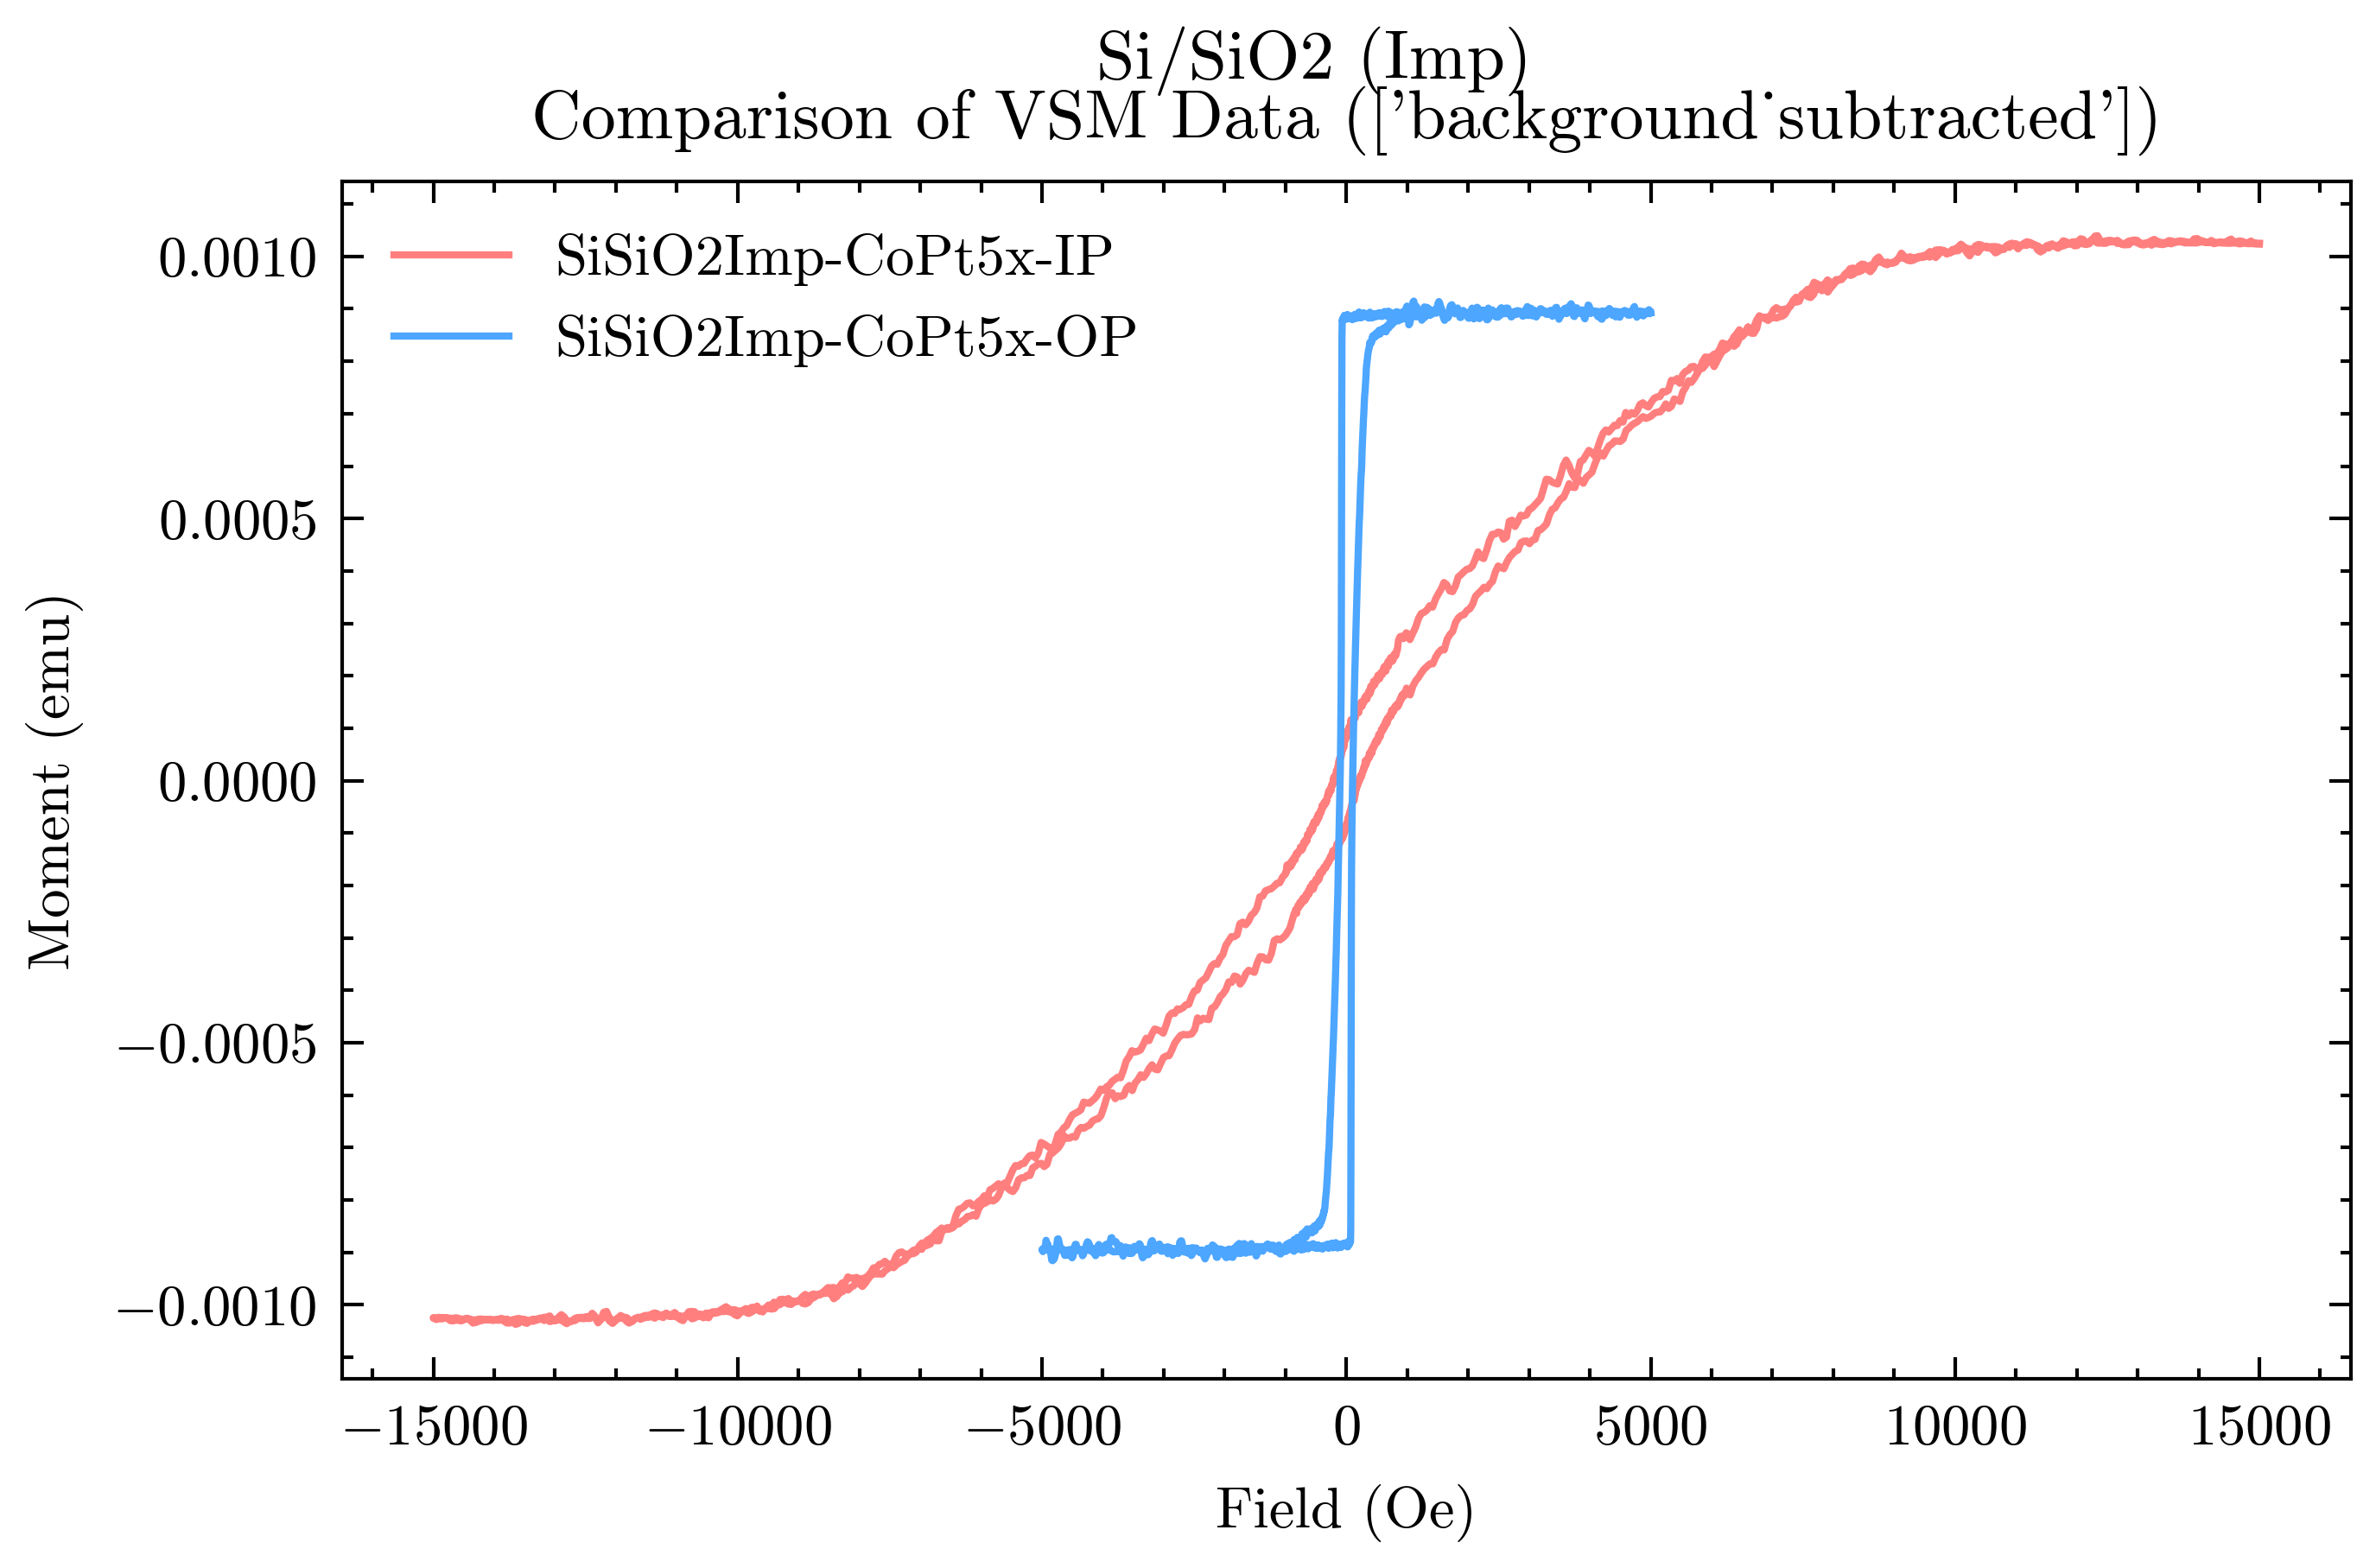

In [13]:
reload(vsmpy)
# Define the colors
light_blue = '#4DA6FF'  # A lighter shade of blue
dark_blue = '#0000FF'   # A darker blue
light_red = '#FF7F7F'   # A lighter shade of red
dark_red = '#FF0000'    # A darker red

# Create a color list
colors = [light_red,light_blue, dark_red,dark_blue]
substrates = ['Al/SiO2', 'Si/SiO2 (Imp)']
for i in [0,2]:
    s_list = [samples[str(i)],samples[str(i+1)]]
    vsmpy.compare_samples(s_list, colors = colors, data_type=['background_subtracted'])
    plt.suptitle(substrates[i//2])
    #plt.ylim(-2500, 2500)